In [7]:
## Load libraries
using OrdinaryDiffEq, ModelingToolkit # DifferentialEquations
using Plots;gr()

Plots.GRBackend()

In [3]:
# Define parameters and variables
@parameters k[1:19] t input
@variables C8(t) C8star(t) C3(t) C3star(t) BAR(t) IAP(t) C8starBAR(t) C3starIAP(t)
@derivatives D'~t



eqs = [D(C8)         ~       k[1] - k[2]*C8 - k[3]*(C3star+input)*C8, 
       D(C8star)     ~       k[3]*(C3star+input)*C8- k[4]*C8star - k[5]*C8star*BAR + k[6]*C8starBAR,
       D(C3)         ~       k[7]-k[8]*C3 - k[9]*C8star*C3,
       D(C3star)     ~       k[9]*C8star*C3 - k[10]*C3star-k[11]*C3star*IAP+k[12]*C3starIAP,
       D(BAR)        ~       k[13] - k[5]*C8star*BAR + k[6]*C8starBAR - k[14]*BAR,
       D(IAP)        ~       k[15] - k[11]*C3star*IAP+k[12]*C3starIAP - (k[16]+k[17]*C3star)*IAP,
       D(C8starBAR)  ~       k[5]*C8star*BAR - k[6]*C8starBAR - k[18]*C8starBAR,
       D(C3starIAP)  ~       k[11]*C3star*IAP - k[12]*C3starIAP - k[19]*C3starIAP ]
sys = ODESystem(eqs,t,[C8, C8star, C3, C3star, BAR, IAP, C8starBAR, C3starIAP],[k...,input])
# Define callback functions for input control
condition(u,t,integrator) = 300<= t <= 1200
affect!(integrator) = integrator.p[20] += 200
cb = DiscreteCallback(condition,affect!)

DiscreteCallback{typeof(condition),typeof(affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, affect!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

In [4]:
# Initial conditions and parameter values
u0 = 1e5*[ 1.30, 0, 0.21, 0, 0.4, 0.4, 0, 0]
# p = [507, 3.9e-3,1e-5,  5.8e-3, 5e-4, 0.21, 81.9, 
    #  3.9e-3, 5.8e-6, 5.8e-3,5e-4, 0.21, 40, 1e-3,464, 1.16e-2, 3e-4, 1.16e-2,1.73e-2,0]
p =[k[1] => 507, 
    k[2] => 3.9e-3,
    k[3] => 1e-5,  
    k[4] => 5.8e-3, 
    k[5] => 5e-4, 
    k[6] => 0.21, 
    k[7] => 81.9, 
    k[8] => 3.9e-3, 
    k[9] => 5.8e-6, 
    k[10] => 5.8e-3,
    k[11] => 5e-4, 
    k[12] => 0.21, 
    k[13] => 40, 
    k[14] => 1e-3,
    k[15] => 464, 
    k[16] => 1.16e-2, 
    k[17] => 3e-4, 
    k[18] => 1.16e-2,
    k[19] => 1.73e-2,
    input => 0]
    
tspan = (0.0,2500.0)


(0.0, 2500.0)

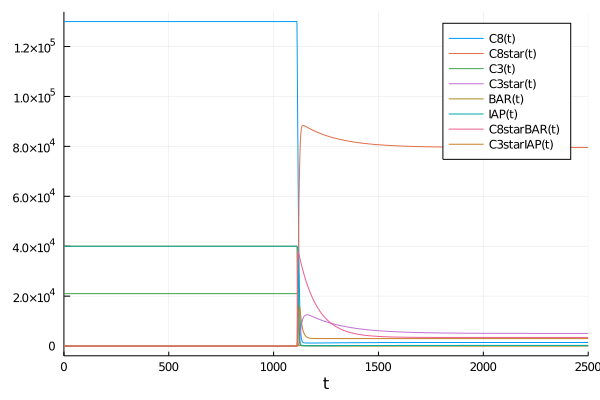

In [8]:
# Solve DE
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Rosenbrock23(),callback=cb)
# plotly() # If want to plot interactively, turn on this line
plot(sol)
